## Homework 2
## Varun Thakur
## ID: 6434134721
## Github User: vdthakur

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1A) Download the Combined Cycle Power Plant data

In [110]:
ccpp_df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")

In [111]:
ccpp_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# 1(B)(i) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [112]:
ccpp_df.shape

(9568, 5)

In [113]:
rows = ccpp_df.shape[0]
columns = ccpp_df.shape[1]

In [114]:
print("Number of Rows =",rows)
print("Number of Columns =", columns)

Number of Rows = 9568
Number of Columns = 5


There are 9,568 rows and 5 columns in this dataset. Each row represents a single instance and each column represents the features (variables) of the instance. In this case the 5 columns represent hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V) and Electrical Energy Output (PE). In this homework, we will use T, AP, RH, and V to predict PE.

# 1(B)(ii) Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

/Users/varunthakur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Pairwise Scatter Plots of CCPP Dataset')

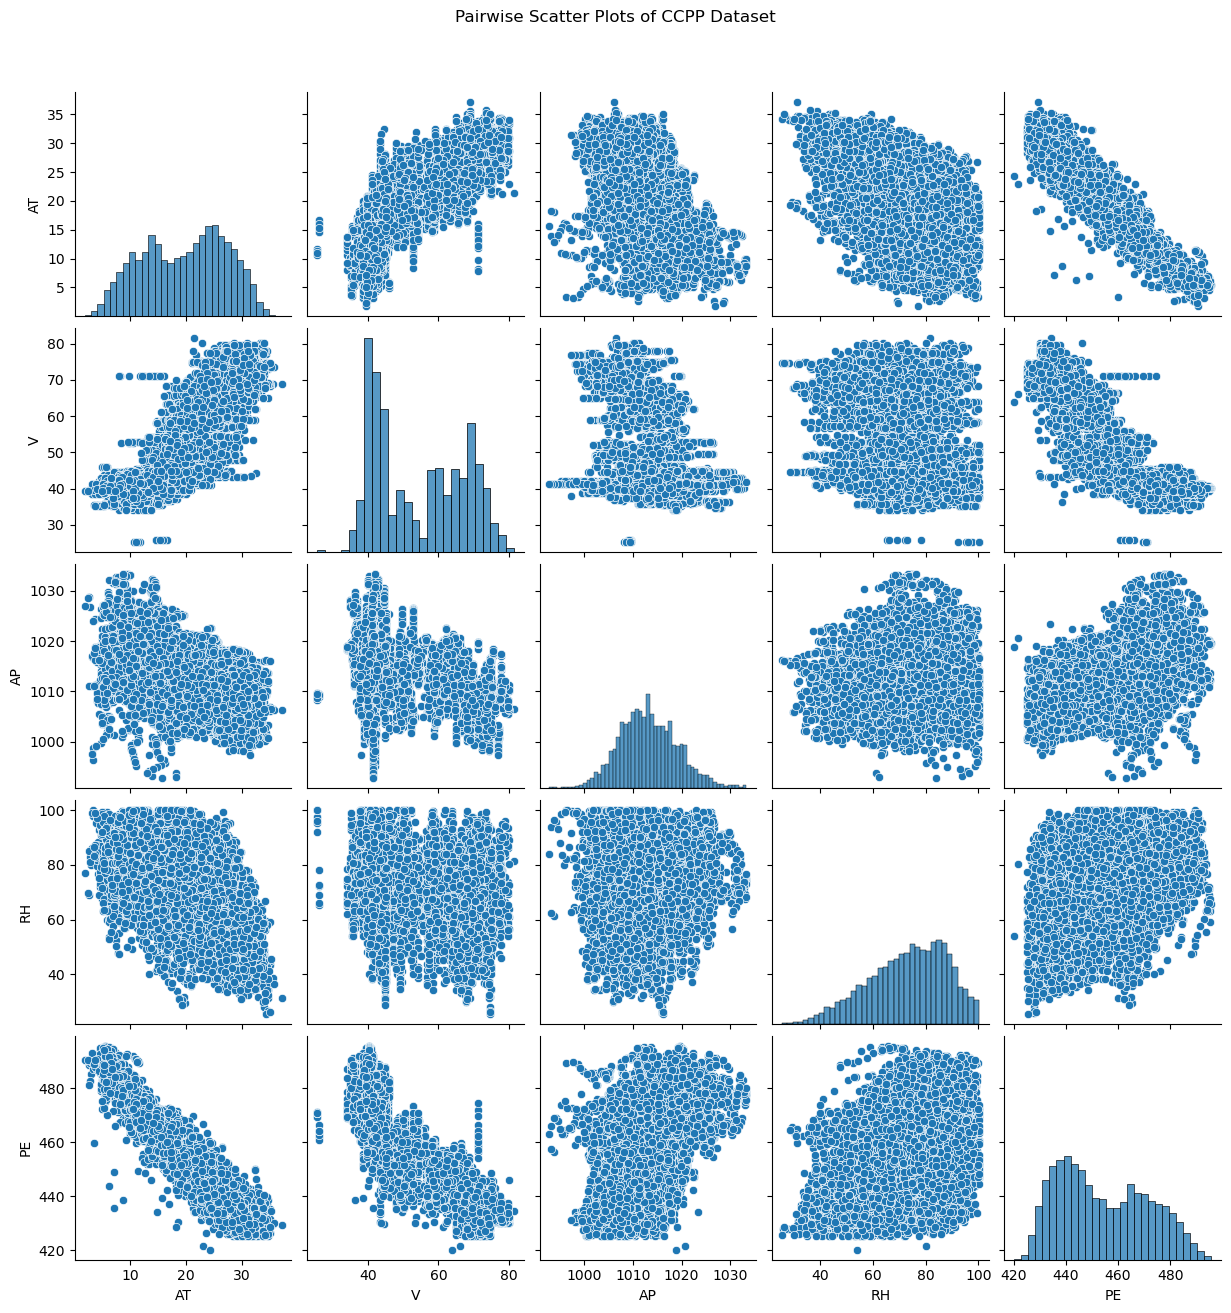

In [115]:
sns.pairplot(ccpp_df)
plt.suptitle("Pairwise Scatter Plots of CCPP Dataset",y=1.05)

From the scatter plots above we can see that there is a strong negative correlation between AV and PE. There is a moderately strong positive correlation between AT and V. In addition there is a moderately negative correlation between V and PE. The remainder of the scatter plots do not show any significant trends as the data points tend to be in clumps or concentrated areas of the plots.

In addition, the distribution of the variable AP looks to follow a normal distribution while the distribution for PE, V, and AV look to be of bimodal distribution nature. The distribution of RH has a rightward skew.

# 1(B)(iii) What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [116]:
ccpp_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### Quartile 1

In [117]:
quartile_one_val = round(ccpp_df.quantile(0.25),2)
quartile_one = pd.DataFrame({"Quartile 1":quartile_one_val})
quartile_one

,Quartile 1
AT,13.51
V,41.74
AP,1009.10
RH,63.33
PE,439.75


### Quartile 3

In [118]:
quartile_three_val = round(ccpp_df.quantile(0.75),2)
quartile_three = pd.DataFrame({"Quartile 3":quartile_three_val})
quartile_three

,Quartile 3
AT,25.72
V,66.54
AP,1017.26
RH,84.83
PE,468.43


### IQR

In [119]:
interquartile_range_val = round(quartile_three_val - quartile_one_val, 2)
interquartile_range = pd.DataFrame({"IQR":interquartile_range_val})
interquartile_range

,IQR
AT,12.21
V,24.80
AP,8.16
RH,21.50
PE,28.68


### Mean

In [120]:
mean_val = round(ccpp_df.mean(),2)
mean = pd.DataFrame({"Mean":mean_val})
mean

,Mean
AT,19.65
V,54.31
AP,1013.26
RH,73.31
PE,454.37


### Median

In [121]:
median_val = round(ccpp_df.median(),2)
median = pd.DataFrame({"Median":median_val})
median

,Median
AT,20.34
V,52.08
AP,1012.94
RH,74.97
PE,451.55


### Range

In [122]:
ranges_val = (ccpp_df.max() - ccpp_df.min())
ranges = pd.DataFrame({"Range":ranges_val})
ranges

,Range
AT,35.30
V,56.20
AP,40.41
RH,74.60
PE,75.50


## Summarize the Quartile 1, Quartile 3, Range, Mean, Median, IQR of Each Variable In a Table.

In [123]:
stats = pd.DataFrame({"Mean":mean_val,"Median":median_val,"Range":ranges_val,"Quartile 1 (25%)":quartile_one_val,"Quartile 3 (75%)":quartile_three_val,"IQR":interquartile_range_val}).transpose()
stats

,AT,V,AP,RH,PE
Mean,19.65,54.31,1013.26,73.31,454.37
Median,20.34,52.08,1012.94,74.97,451.55
Range,35.30,56.20,40.41,74.60,75.50
Quartile 1 (25%),13.51,41.74,1009.10,63.33,439.75
Quartile 3 (75%),25.72,66.54,1017.26,84.83,468.43
IQR,12.21,24.80,8.16,21.50,28.68


The Quartile 1, Quartile 3, Range, Mean, Median, IQR of Each Variable is Summarized Above

# 1C) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?


Variable: AT
R^2 = 0.8989475964148236


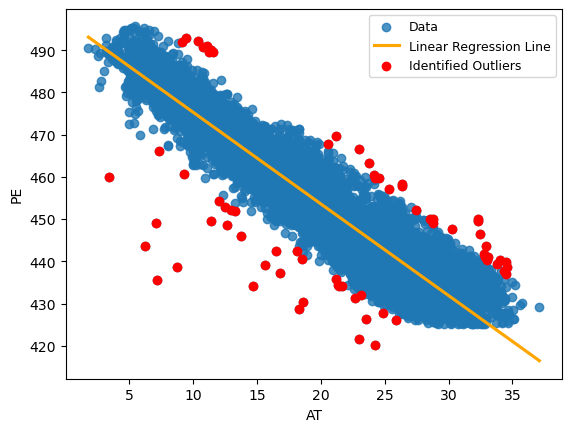

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:14   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

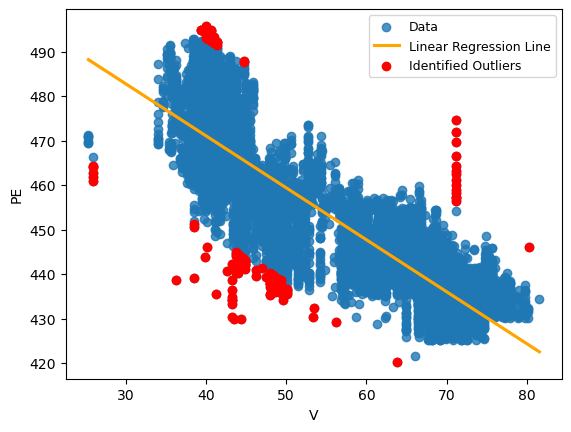

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:14   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

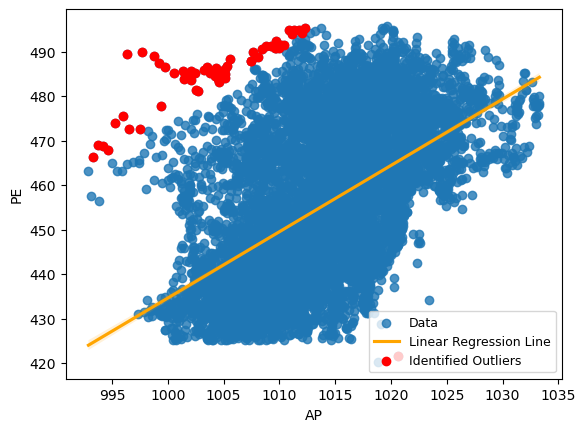

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:15   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

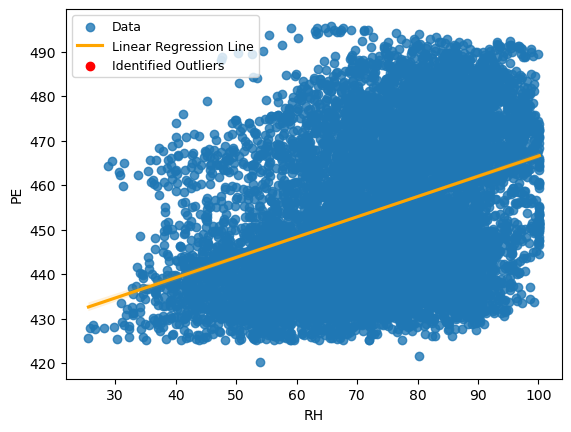

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:15   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [124]:
indepen_variable = ["AT","V","AP","RH"]
depen_variable = "PE"
coefficients_uni = {}
for variable in indepen_variable:
    x = ccpp_df[variable]
    constant_X = sm.add_constant(x)
    y = ccpp_df[depen_variable]
    lin_reg = sm.OLS(y, constant_X).fit()
    summary = lin_reg.summary()
    sns.regplot(x=variable, y=depen_variable, data=ccpp_df,line_kws={'color':'orange','label':"Linear Regression Line"},label='Data')
    r_squared = lin_reg.rsquared
    coefficients_uni[variable] = lin_reg.params[variable]

    
    
    
    residual_values = lin_reg.resid
    quartile_1 = residual_values.quantile(0.25)
    quartile_3 = residual_values.quantile(0.75)
    IQR = quartile_3 - quartile_1
    outlier_lower_bound = quartile_1 - 1.5 * IQR
    outlier_upper_bound = quartile_3 + 1.5 * IQR
    outliers = (residual_values < outlier_lower_bound)|(residual_values > outlier_upper_bound)
    plt.scatter(x[outliers], y[outliers], color='red', marker='o', label='Identified Outliers')


    print("\nVariable:", variable)
    print("R^2 =",r_squared)
    plt.legend(fontsize=9)
    plt.show()
    print(summary)

    
    
   

In [125]:
coefficients_df = pd.DataFrame(list(coefficients_uni.values()), index = coefficients_uni.keys())

AT, V, RH, AP have a statistically significant association with PE as all of their p-values are 0.000 which is below the alpha threshold of 0.05. (reject the null that there is no significant association with PE)

Although RH and AP maintains a p-value of 0.000, they are not good at making accurate predictions as their low R squared ( = 0.15 for RH and 0.27 for AP) value shows a large degree of unexplained variance. 

### Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [126]:
indepen_variable = ["AT","V","AP","RH"]
depen_variable = "PE"
for variable in indepen_variable:
    x = ccpp_df[variable]
    constant_X = sm.add_constant(x)
    y = ccpp_df[depen_variable]
    lin_reg = sm.OLS(y, constant_X).fit()
    summary = lin_reg.summary()
    residual_values = lin_reg.resid
    quartile_1 = residual_values.quantile(0.25)
    quartile_3 = residual_values.quantile(0.75)
    IQR = quartile_3 - quartile_1
    outlier_lower_bound = quartile_1 - 1.5 * IQR
    outlier_upper_bound = quartile_3 + 1.5 * IQR
    outliers = (residual_values < outlier_lower_bound) | (residual_values > outlier_upper_bound)
    outlier_list = residual_values[outliers]
        
    if len(outlier_list) > 0:
        print("\nOutliers Found For Variable:", variable)
        print()
        print(outlier_list)
    elif len(outlier_list) == 0:
        print()
        print("No Outliers Were Found for",variable)


Outliers Found For Variable: AT

202     18.736150
310    -14.901489
437    -16.802100
464     18.590161
611     18.055301
          ...    
8732   -15.968469
9121   -15.196376
9148    15.393042
9431   -14.700359
9477    17.145898
Length: 70, dtype: float64

Outliers Found For Variable: V

21      24.245648
24     -24.970159
182     31.859607
199     23.395648
388    -24.712105
          ...    
9021   -21.652465
9072   -21.462105
9089   -26.542810
9096   -22.505174
9335   -22.077744
Length: 140, dtype: float64

Outliers Found For Variable: AP

57      41.712422
154     42.190950
252     42.686071
511     42.458590
606     42.558830
          ...    
8827    44.302260
8841    42.574690
8855    42.055278
9124    43.465001
9153    49.710291
Length: 63, dtype: float64

No Outliers Were Found for RH


Yes, outliers were found for variables T, V, and AP but not for RH. The outliers can be seen above as well as visualized on the scatter plots above as Red Data Points. These outliers could be removed for AT, V, and AP to help the regression to better fit the data. However, RH was not found to have any outliers so I do not believe the RH and PE regression can improve. 

I believe removing outliers would help the regression of AP as 140 outliers were found which, if removed, could help improve its currently low R squared.

# 1D) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [127]:
multiple_x = ccpp_df[["AT","V","AP","RH"]]
constant_multiple_x = sm.add_constant(multiple_x)
multiple_y = ccpp_df["PE"]
multiple_lin_reg = sm.OLS(multiple_y, constant_multiple_x).fit()
print(multiple_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:16   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [128]:
coefficients = multiple_lin_reg.params
coefficients_multi = pd.DataFrame(coefficients)
coefficients_multi_df = coefficients_multi.drop("const")

We can reject the null hypothesis that the coefficient (βj) is equal to 0 because for all predictors (AT, V, AP, and RH) because their coefficients yield a P-Value of 0.000 which is below the threshold of 0.05.

# 1E) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

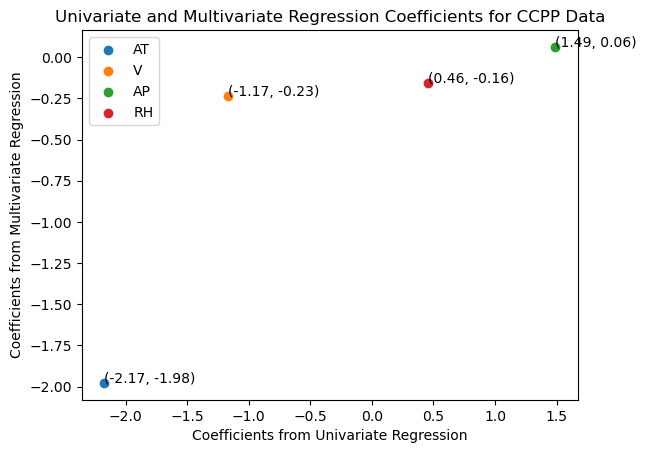

In [129]:
combined_data = zip(coefficients_df.index, coefficients_df.values, coefficients_multi_df.values)
for label, xvalue, yvalue in combined_data:
    plt.scatter(xvalue, yvalue, marker='o', label=label)
    x_point_label = float(xvalue)
    y_point_label = float(yvalue)
    plt.xlabel("Coefficients from Univariate Regression")
    plt.ylabel("Coefficients from Multivariate Regression")
    plt.title("Univariate and Multivariate Regression Coefficients for CCPP Data")
    plt.text(xvalue,yvalue,(round(x_point_label,2),round(y_point_label,2)))
plt.legend()

Except for the variable AT, there seems to be a larger coefficient for the Variables in univariate regression as opposed to multivariate regression. In addition the direction of correlation is maintained (negatively or positively)

# 1F) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y =β0 +β1X+β2X2 +β3X3 +ε

In [130]:
for variable in indepen_variable:
    x = pd.DataFrame(ccpp_df[variable])
    y = ccpp_df[depen_variable]
    polynomial = PolynomialFeatures(3)
    X = polynomial.fit_transform(x)
    X = sm.add_constant(X)
    regression = sm.OLS(y, X).fit()
    print()
    print("Summary For:",variable)
    print()
    print(regression.summary())


Summary For: AT

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:16   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673  

Yes for the variables AT, AP, and RH there is statistically signficant evidence of non linear relationship as the P-value for x2 for these variables is 0.000 which is below the threshold of 0.05. (reject the null)

The variable V has a P value (0.768) for x2 that falls far above the threshold so we cannot say there is evidence it has a non-linear relationsip. (fail to reject the null)

Although the x3 values are statistically significant, their coefficients are very small and therefore do not suggest they add much to the relationship.

# 1G) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [131]:
pairwise_interactions = 'PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'
pairwise_regression = sm.OLS.from_formula(formula=pairwise_interactions, data=ccpp_df).fit()
print(pairwise_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:16   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

We can reject the null hypothesis that there is no association of interactions of predictors on the response as AP:RH , RH , AP , V , AT:V , AT:RH , V:AP have a P value that falls below the 0.05 threshold suggesting there is an association between the interactions of predictors on the response.

However, we fail to reject the null hypothesis for the interaction terms AT:AP and V:RH as their P value falls above the threshold of 0.05.


# 1H) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.


In [132]:
train, test = train_test_split(ccpp_df, train_size=0.7, random_state = 2)
X_train = train[["AT","V","AP","RH"]]
y_train = train["PE"]
X_test = test[["AT","V","AP","RH"]]
y_test = test["PE"]

### All Predictors Regression Train and Predict

In [133]:
all_predictor = 'PE ~ AT + V + AP + RH'
all_predictiors_regression = sm.OLS.from_formula(formula=all_predictor,data=train).fit()
print(all_predictiors_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.159e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:16   Log-Likelihood:                -19703.
No. Observations:                6697   AIC:                         3.942e+04
Df Residuals:                    6692   BIC:                         3.945e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.5359     11.758     38.657      0.0

In [134]:
y_predictions_all_pred_train = all_predictiors_regression.predict(X_train)
y_predictions_all_pred_test = all_predictiors_regression.predict(X_test)
mse_all_pred_train = mean_squared_error(y_train,y_predictions_all_pred_train)
mse_all_pred_test = mean_squared_error(y_test,y_predictions_all_pred_test)
print("The MSE Train from the All Predictors Regression Is:",mse_all_pred_train)
print("The MSE Test from the All Predictors Regression Is:",mse_all_pred_test)

The MSE Train from the All Predictors Regression Is: 21.037729927813142
The MSE Test from the All Predictors Regression Is: 20.140613089204553


The MSE Train from the All Predictors Regression Is: 21.037729927813142

The MSE Test from the All Predictors Regression Is: 20.140613089204553

### Regression of All Predictors and All Quadratic Non Linearities and All Possible Pairwise Interactions

In [135]:
all_poss_int_quad_terms = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'
all_poss_int_quad_terms_regression = sm.OLS.from_formula(formula=all_poss_int_quad_terms,data=train).fit()
print(all_poss_int_quad_terms_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7117.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:16   Log-Likelihood:                -19252.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.864e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -8380.0049   1457.282     

In [136]:
y_predictions_all_poss_int_quad_terms_train = all_poss_int_quad_terms_regression.predict(X_train)
y_predictions_all_poss_int_quad_terms_test = all_poss_int_quad_terms_regression.predict(X_test)
mse_all_poss_int_quad_terms_train = mean_squared_error(y_train,y_predictions_all_poss_int_quad_terms_train)
mse_all_poss_int_quad_terms_test = mean_squared_error(y_test,y_predictions_all_poss_int_quad_terms_test)
print("The MSE Train from the All Possible Pairwise Interactions and Quadratics Terms Regression Is:",mse_all_poss_int_quad_terms_train)
print("The MSE Test from the All Possible Pairwise Interactions and Quadratics Terms Regression Is:",mse_all_poss_int_quad_terms_test)

The MSE Train from the All Possible Pairwise Interactions and Quadratics Terms Regression Is: 18.386049365206844
The MSE Test from the All Possible Pairwise Interactions and Quadratics Terms Regression Is: 17.472545808634607


The MSE Train from the All Possible Pairwise Interactions and Quadratics Terms Regression Is: 18.386049365206844


The MSE Test from the All Possible Pairwise Interactions and Quadratics Terms Regression Is: 17.472545808634607


### Regression of All Predictors and All Significant Quadratic Non Linearities and All Significant Pairwise Interactions

Individual predictors were not removed even though AT had a high P value above the threshold. Without the individual predictors, any interaction terms cannot be assessed.

V:RH, V:AP, AT:AP, and np.power(V,2) or V^2 were the Interaction Terms and Quadratic Non Linearities that were not significant and left out of the pairwise formula below as their P values fell above the threshold of 0.05.

In [137]:
all_pair_quad_terms_significant = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT:V + AT:RH + V:AP + AP:RH'
all_pair_quad_terms_significant_regression = sm.OLS.from_formula(formula=all_pair_quad_terms_significant,data=train).fit()
print(all_pair_quad_terms_significant_regression.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9054.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:16   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6685   BIC:                         3.862e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -8580.8836   1274.559     

In [138]:
y_predictions_all_pair_significant_train = all_pair_quad_terms_significant_regression.predict(X_train)
y_predictions_all_pair_significant_test = all_pair_quad_terms_significant_regression.predict(X_test)
mse_train_all_pair_significant = mean_squared_error(y_train,y_predictions_all_pair_significant_train)
mse_test_all_pair_significant = mean_squared_error(y_test,y_predictions_all_pair_significant_test)
print("The MSE Train from the All Significant Pairwise Interactions and Quadratic Non Linearities Regression Is:",round(mse_train_all_pair_significant,3))
print("The MSE Test from the All Significant Pairwise Interactions and Quadratic Non Linearities Regression Is:",round(mse_test_all_pair_significant,3))

The MSE Train from the All Significant Pairwise Interactions and Quadratic Non Linearities Regression Is: 18.401
The MSE Test from the All Significant Pairwise Interactions and Quadratic Non Linearities Regression Is: 17.448


The MSE Train from the All Significant Pairwise Interactions and Quadratic Non Linearities Regression Is: 18.401


The MSE Test from the All Significant Pairwise Interactions and Quadratic Non Linearities Regression Is: 17.448


### Summary of Train and Test Errors

In [139]:
mse_summary = pd.DataFrame({'MSE Train All Predictors': [mse_all_pred_train] ,'MSE Test All Predictors': [mse_all_pred_test],'MSE Train All Pairwise and Quadratic':[mse_all_poss_int_quad_terms_train], 'MSE Test All Pairwise and Quadratic':[mse_all_poss_int_quad_terms_test],'MSE Train All Significant Pairwise and Quadratic': [mse_train_all_pair_significant],'MSE Test All Significant Pairwise and Quadratic':[mse_test_all_pair_significant]})
mse_summary

,MSE Train All Predictors,MSE Test All Predictors,MSE Train All Pairwise and Quadratic,MSE Test All Pairwise and Quadratic,MSE Train All Significant Pairwise and Quadratic,MSE Test All Significant Pairwise and Quadratic
0,21.03773,20.140613,18.386049,17.472546,18.401304,17.447605


The Train and Test Error for the Various Models Can Be Seen Above. 

The Train Error drops by 3 and Test Error drops by 2 when pairwise interactions terms and quadratic non linearities are used in the regression.

However, there is a very slight increase in error in Train Error and very slight decrease in Test Error when removing insignificant pairwise interactions and insignificant quadratic linearities.

# 1i) Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

## Raw Data K Neighbors Regression

The Best Test Error for The Raw Data Is: 15.241585843347265
The Best K Value for the Raw Data Is: 4.0


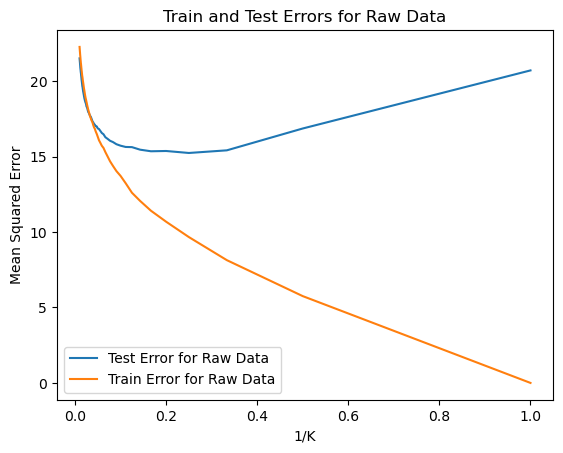

In [140]:
k_range = range(1,101,1)
test_error_raw = []
k_value = []
train_error_raw = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    stored_k = 1/(k)
    k_value.append(stored_k)
    y_predictions_train_raw = knn.predict(X_train)
    y_predictions_test_raw = knn.predict(X_test)
    mse_knn_train_raw = mean_squared_error(y_train,y_predictions_train_raw)
    train_error_raw.append(mse_knn_train_raw)
    mse_knn_test_raw = mean_squared_error(y_test,y_predictions_test_raw)
    test_error_raw.append(mse_knn_test_raw)
plt.plot(k_value,test_error_raw, label = "Test Error for Raw Data")
plt.plot(k_value,train_error_raw, label = "Train Error for Raw Data")
plt.title("Train and Test Errors for Raw Data")
plt.xlabel("1/K")
plt.ylabel("Mean Squared Error")
plt.legend()
min_test_error_ind_raw = test_error_raw.index(min(test_error_raw))  
min_k_raw = k_value[min_test_error_ind_raw]
best_min_k_raw = 1 / min_k_raw
print("The Best Test Error for The Raw Data Is:",min(test_error_raw))
print("The Best K Value for the Raw Data Is:",best_min_k_raw)

k = 4 gives the best MSE Test error of 15.24 from the Raw Data

## Normalized Data K Neighbors Regression

The Best Test Error for the Normalized Data Is: 19.164965745276035
The Best K-Value for the Normalized Data Is: 8.0


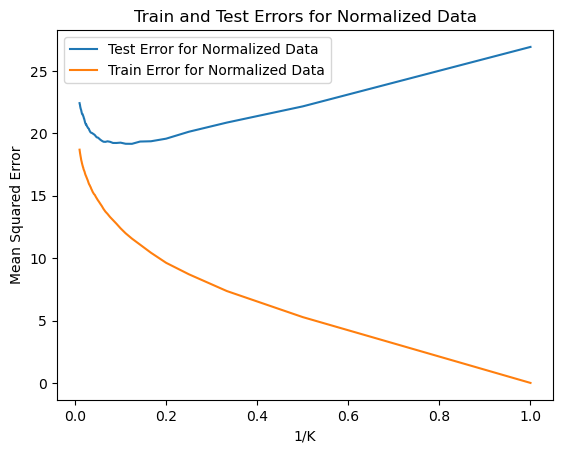

In [141]:
k_range = range(1,101,1)
test_error_norm = []
k_values = []
train_error_norm = []
normalize_data = MinMaxScaler()
X_train_normalized = normalize_data.fit_transform(X_train)
X_test_normalized = normalize_data.fit_transform(X_test)
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_normalized, y_train)
    stored_k = 1/(k)
    k_values.append(stored_k)
    y_predictions_train_norm = knn.predict(X_train_normalized)
    y_predictions_test_norm = knn.predict(X_test_normalized)
    mse_knn_train_norm= mean_squared_error(y_train,y_predictions_train_norm)
    train_error_norm.append(mse_knn_train_norm)
    mse_knn_test_norm = mean_squared_error(y_test,y_predictions_test_norm)
    test_error_norm.append(mse_knn_test_norm)
plt.plot(k_values,test_error_norm, label = "Test Error for Normalized Data")
plt.plot(k_values,train_error_norm, label = "Train Error for Normalized Data")
plt.title("Train and Test Errors for Normalized Data")
plt.xlabel("1/K")
plt.ylabel("Mean Squared Error")
plt.legend()
min_test_error_ind_norm = test_error_norm.index(min(test_error_norm))  
min_k_norm = k_values[min_test_error_ind_norm]
best_min_k_norm = 1 / min_k_norm
print("The Best Test Error for the Normalized Data Is:",min(test_error_norm))
print("The Best K-Value for the Normalized Data Is:", best_min_k_norm)

k = 8 gives the best MSE Test error of 19.16 for the Normalized Data

# 1J) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis

In [142]:
mse_summary

,MSE Train All Predictors,MSE Test All Predictors,MSE Train All Pairwise and Quadratic,MSE Test All Pairwise and Quadratic,MSE Train All Significant Pairwise and Quadratic,MSE Test All Significant Pairwise and Quadratic
0,21.03773,20.140613,18.386049,17.472546,18.401304,17.447605


In [143]:
print("The Best Test Error for The Raw Data Is:",round(min(test_error_raw),3))
print("The Best Test Error for the Normalized Data Is:",round(min(test_error_norm),3))

The Best Test Error for The Raw Data Is: 15.242
The Best Test Error for the Normalized Data Is: 19.165


The Test Error for the Raw Data using K Neighbors Regression yielded a far lower Test Error of 15.242 when compared to the smallest linear regression test error of 17.45 which was yielded when using all significant pairwise interactions and significant quadratic non-linearities as seen above. The Normalized Data on the other hand produced a test error of 19.17 that was 2 more than the smallest linear regression test error 17.45 (MSE Test All Significant Pairwise and Quadratic)

This suggests that on the Raw Data, K Neighbors Regression may be a better approach as oppose to the various linear regression methods attempted.

# 2) ISLR 2.4.1 
## For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

### (a) The sample size n is extremely large, and the number of predictors p is small.

In addition to a small amount of predictors, if the sample size is large there can be more complexity within the data so I believe a flexible statistical learning method would be more appropriate than inflexible method. With only a small amount of predictors, an inflexible statistical learning method would be underfit.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

If the number of predictors is large but observations are small a flexible statistical learning method would not be apporpriate. An inflexible statistical learning method would be appropriate as it would able to avoid overfitting to the small amount of data present. A inflexible statistical learning method would be able to extract the more general patterns that can be derived from smaller amounts of data.

### (c) The relationship between the predictors and response is highly non-linear.

If the relationship between the predictors and response is highly non-linear, I would expect a flexible statistical learning method to be more appropriate as it can be better fit to the complexities and specifities that comes with non-linear relationships.

### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

If the variance in the error terms is significantly high, a flexible statistical learning method would not be more appropriate than an inflexible statistical learning method because the flexible statistical learning method will fit to the high variance and in turn be overfitting. An inflexible statistical learning method would help derive the more general trends.

# 3) ISLR 2.4.7 
###  The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

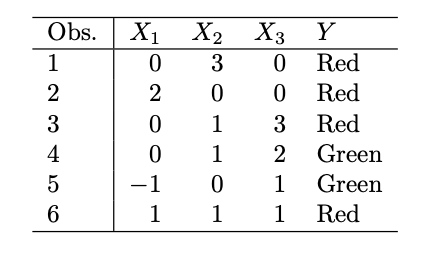

### a) Compute the Euclidean distance between each observation and the testpoint , X1=X2=X3=0.

In [144]:
islr_df = pd.DataFrame({'X1': [0,2,0,0,-1,1],'X2': [3,0,1,1,0,1],'X3': [0,0,3,2,1,1]})
islr_point = pd.DataFrame({'X1': [0],'X2': [0],'X3': [0]})
distances = euclidean_distances(islr_df, islr_point)
table = pd.DataFrame(distances, columns=["Euclidean Distance"])
table.index = table.index + 1

print()
print("Values on Left of Table Represent the Observation from Which Euclidean Distance was Calculated")
table


Values on Left of Table Represent the Observation from Which Euclidean Distance was Calculated


,Euclidean Distance
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


### (b) What is our prediction with K = 1? Why?

Our prediction is green for k = 1 because smallest Euclidean Distance corresponds to the 5th observation which was classified as Green

### (c) What is our prediction with K = 3? Why?

The 3 smallest Euclidean Distances are between the test point and Observation 2 , 5 , and 6. Observation 2 and 6 are classified as Red and Observation 5 is classified as green. Because majority of the 3 observations that yielded the smallest euclidean distances were classified as red, our prediction will be red for k = 3.


### (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

I would expect the best K-Value to be small because smaller K values allow for greater sensitivity to model more specific non-linear variations. A smaller K would help localize the classification to a more specific area where as a greater K could include points of too far away. This would not be beneficial for non linear problems because it may capture too much noise.






# References

https://scikit-learn.org/stable/modules/preprocessing.htm\#generating-polynomial-features

https://www.w3schools.com/python/ref_func_zip.asp

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://developer.nvidia.com/blog/a-comprehensive-guide-to-interaction-terms-in-linear-regression/

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html